# Estimating a continuous variable from a near-infrared spectra

In this example data set we aim to predict a continous variable. This is the case for instance in the food industry, where one wants to predict nutrient content.



## Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("./data/nir.csv", header=None, index_col=0, sep=";")

In [3]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
0,,,,,,,,,,,,,,,,,,,,,
1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,0.580741,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,0.349470,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,0.760069,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355
6,7.619196,1.030475,1.028552,1.026215,1.023312,1.019820,1.015712,1.010988,1.005641,0.999669,...,0.212103,0.211988,0.211985,0.212118,0.212253,0.212366,0.212520,0.212720,0.212965,0.213222
7,24.332531,1.043301,1.042196,1.040849,1.039130,1.037030,1.034543,1.031686,1.028533,1.025166,...,0.247601,0.245244,0.243070,0.241018,0.239089,0.237248,0.235469,0.233783,0.232188,0.230715
8,36.571758,0.920085,0.919237,0.918164,0.916782,0.915112,0.913146,0.910897,0.908407,0.905766,...,0.333014,0.330957,0.329072,0.327309,0.325689,0.324237,0.322888,0.321700,0.320748,0.319868
9,55.902779,0.740965,0.739985,0.738664,0.737132,0.735201,0.732822,0.730385,0.727357,0.724210,...,0.159469,0.158417,0.157381,0.156452,0.155575,0.154856,0.154160,0.153571,0.153044,0.152560


In [4]:
df.columns = ['target']+[i for i in range(1,681)]

In [5]:
from ipywidgets import interact

In [6]:
ymin=df.iloc[:,1:].min().min()
ymax=df.iloc[:,1:].max().max()

In [7]:
def choose_spectra(val):
    tol = 0.5
    ix=np.where((df.iloc[:,0]>=val-tol) & (df.iloc[:,0]<=val+tol) )[0][0]
    plt.figure(figsize=(5,5))
    plt.plot(df.iloc[ix,1:])
    plt.ylim(ymin,ymax)
    plt.show()

In [8]:
minval=df.iloc[:,0].min()
maxval=df.iloc[:,0].max()

In [9]:
interact(choose_spectra, val=(minval,maxval));

interactive(children=(FloatSlider(value=39.83231235, description='val', max=76.603981, min=3.0606437), Output(…

## Baseline model

We will use PLS as a baseline model

In [10]:
X_train=df.iloc[:,1:].values
y_train=df.iloc[:,0].values

In [11]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV


In [12]:
pls = PLSRegression()
gs=GridSearchCV(pls, {'n_components':[5,10,15,20,25]})

In [13]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
gs.best_estimator_

PLSRegression(copy=True, max_iter=500, n_components=25, scale=True, tol=1e-06)

In [15]:
gs.best_score_

0.9902847877290011

In [16]:
import seaborn as sns

In [17]:
X_train_r = gs.transform(X_train)

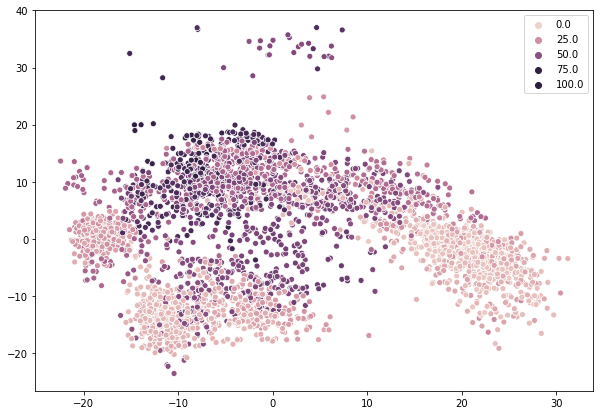

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_train_r[:,0], X_train_r[:,1], hue=y_train)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca= pca.fit_transform(X_train)

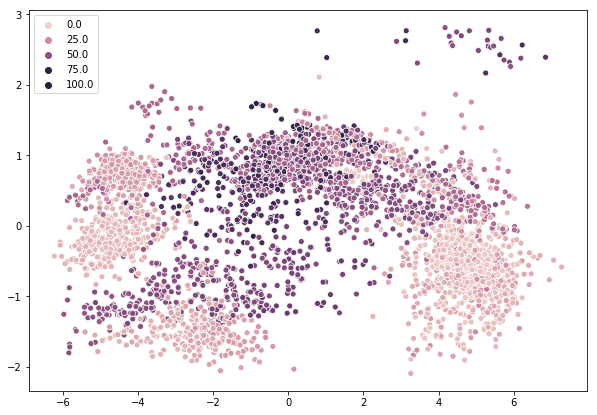

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train)

In [21]:
y_train_clf = np.where(y_train>50, 1, 0)

In [22]:
y_train_clf

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
X_train_clf, _ = pls.fit_transform(X_train, y_train_clf)

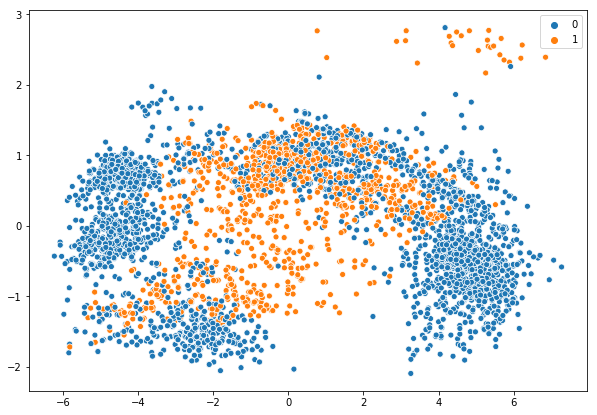

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train_clf)

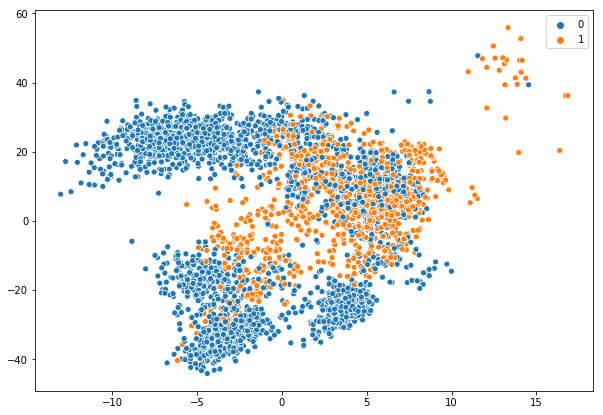

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_train_clf[:,0], X_train_clf[:,1], hue=y_train_clf)

In [26]:
X_train_clf.shape

(3908, 2)